# Import Libraries 

In [2]:
import pandas as pd
import numpy as np
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
df_2020 = pd.read_csv("C:/suhas/IT2020.csv")

# Data Cleaning

In [5]:
#error in the name removed space 
df_new = df_2020.rename(columns = {'Position ':'Position'}, inplace = True)

In [6]:
#droped the 3 columns 
df_new = df_2020.drop(['Timestamp', 'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR','Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country' ,'Number of vacation days', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week','Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'], axis=1)


In [7]:
#numeric features
numeric = ['Age','Yearly brutto salary (without bonus and stocks) in EUR']

In [8]:
# categorical features
categorical = ['Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?']

In [9]:
# fill missing values

# >>> categorical features
missing_text = '_MISSING_'
df_new[categorical] = df_2020[categorical].fillna(missing_text)

# >>> numerical features
missing_num = 0
df_new[numeric] = df_2020[numeric].fillna(missing_num)

In [10]:
#Replacing all single types in Company type to _others_

df_new["Company type"].replace({"Bank": "_Others_","Media": "_Others_","Personal Ltd": "_Others_","Big commercial": "_Others_","Outsorce": "_Others_","Science Institute ": "_Others_",
                                "_MISSING_": "_Others_","IT-Outsourcing": "_Others_","Automotive": "_Others_","BehÃ¶rde": "_Others_","Biergarten ": "_Others_","Bloody enterprise": "_Others_",
                                 "Cloud": "_Others_","Concern": "_Others_","Construction": "_Others_","consumer goods": "_Others_","corporate incubator": "_Others_","Corporation": "_Others_",
                                 "Ecommerce": "_Others_","eCommerce": "_Others_","E-commerce": "_Others_","e-commerce": "_Others_","Education": "_Others_",
                                 "Energy": "_Others_","Enterprise": "_Others_","FAANG": "_Others_","Finance": "_Others_","IT-Outsourcing": "_Others_",
                                 "Financial": "_Others_","Fintech": "_Others_","Fintech": "_Others_","freelance": "_Others_","Full-time position in Education, part-time position in at a data startup": "_Others_",
                                 "Game Company": "_Others_","Handel": "_Others_", "Industry": "_Others_","Institute": "_Others_","Insurance": "_Others_","IT Department of established business": "_Others_",
                                 "Market Research": "_Others_", "Multinational": "_Others_", "Non-tech retail": "_Others_","Old industry": "_Others_","Outsorce": "_Others_","Outsourse": "_Others_","Personal Ltd": "_Others_",
                                 "Pharma": "_Others_","Systemhaus": "_Others_","Telecommunications": "_Others_",
                                 "Transport & Logistics": "_Others_","University": "_Others_","Utilities": "_Others_",
                                  "SaaS": "_Others_","service": "_Others_","Publishing and Technology": "_Others_","Market Research ": "_Others_","corporate incubator": "_Others_","Corporation": "_Others_",
                                "Retail": "_Others_","Handel ": "_Others_","Research": "_Others_","Publisher": "_Others_","Consulting and Product": "_Others_","E-Commerce": "_Others_",
                                 "Bank ": "_Others_","Financial ": "_Others_","Research institute": "_Others_","Semiconductor": "_Others_","Automotive ": "_Others_","Energy ": "_Others_",
                                 "Multinational ": "_Others_","Corporation ": "_Others_","Behörde": "_Others_","Semiconductor": "_Others_",
                                 }, inplace=True)

In [11]:
#Replacing all single values  to _others_
df_new["Have you lost your job due to the coronavirus outbreak?"].replace({"Have been a freelancer at the beginning of year": "_MISSING_","i didn't but will be looking for new one because of covid": "_MISSING_",
                                                                           "kurzarbeitzeit for 1.5 months": "_MISSING_","Laid off for a bit": "_MISSING_","Laid off for a bit": "_MISSING_","Leads and project inquiries have slowed down":
                                                                            "_MISSING_","Lost the job but for different reason": "_MISSING_","yes but found a new one with better pay / perks":"_MISSING_","No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months":"_MISSING_"}, inplace=True)

df_new["Have you lost your job due to the coronavirus outbreak?"].replace({"_MISSING_":"_OTHERS_"}, inplace=True)

In [15]:
#Replacing "Diverse" with "_MISSING_"_
df_new["Gender"].replace({"Diverse": "_MISSING_"}, inplace=True)


,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,Full-time employee,Unlimited contract,English,51-100,Product,No
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,_MISSING_,80000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,_MISSING_,54000.0,Full-time employee,Unlimited contract,English,51-100,Startup,No
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,Full-time employee,Unlimited contract,English,101-1000,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,Full-time employee,Unlimited contract,English,51-100,Product,Yes
1249,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,_MISSING_,60000.0,Full-time employee,Unlimited contract,English,1000+,Product,No
1250,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,Full-time employee,Unlimited contract,English,101-1000,_Others_,No
1251,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,Full-time employee,Unlimited contract,German,101-1000,Product,No


# Removing Outliners 

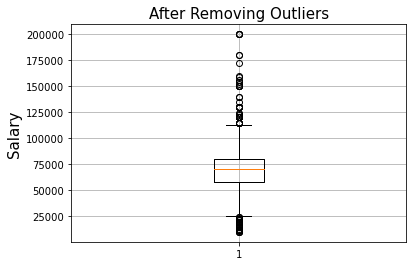

In [14]:
# remove outliners very high values
cut_point = 200000
df_new = df_new[df_new['Yearly brutto salary (without bonus and stocks) in EUR'] <= cut_point]
plt.boxplot(df_new['Yearly brutto salary (without bonus and stocks) in EUR'])
plt.title('After Removing Outliers',fontsize = 15)
plt.ylabel('Salary',fontsize = 15)
plt.grid()
plt.show()

# Visualization After Data Cleaning

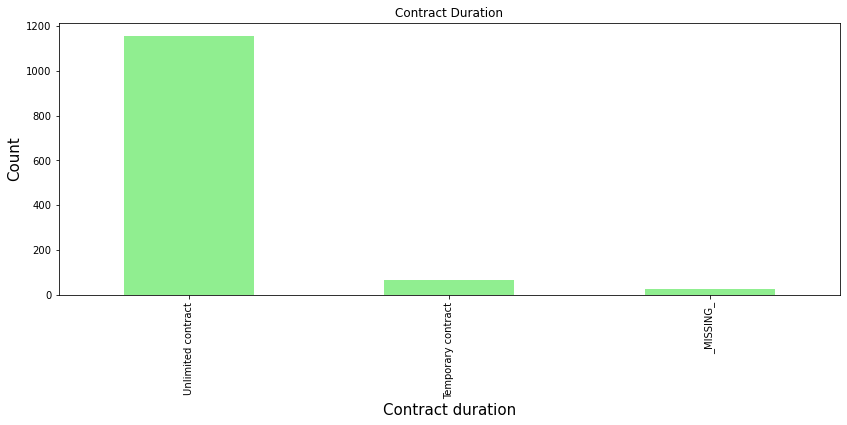

In [16]:
df_new["Сontract duration"].replace({"0": "_MISSING_"}, inplace=True) 
plt.figure(figsize=(14,5))
val_c = df_new["Сontract duration"].value_counts()
if len(val_c) <= 10:
    val_c.plot(kind='bar', color='lightgreen')
    plt.title('Сontract Duration')
    plt.xlabel('Сontract duration',fontsize = 15) 
    plt.ylabel('Count', fontsize = 15) 
else: # if more than 20 levels show only the most frequent 10
    val_c[0:20].plot(kind='bar', color='blue')
    plt.title('Сontract Duration',fontsize = 15) 
    plt.show()
        

Text(0.5, 1.0, 'Count Of People Who Are Having Different Contracts')

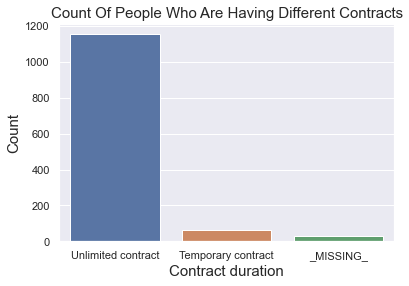

In [17]:
df_new["Сontract duration"].replace({"0": "_MISSING_"}, inplace=True) 

sns.set()
ax = sns.countplot(x="Сontract duration",data=df_new)

plt.xlabel('Сontract duration',fontsize = 15) 
plt.ylabel('Count', fontsize = 15) 
plt.title("Count Of People Who Are Having Different Contracts", fontsize = 15)

Text(0.5, 1.0, 'Employees Who Lost Job Due To Coronavirus Outbreak')

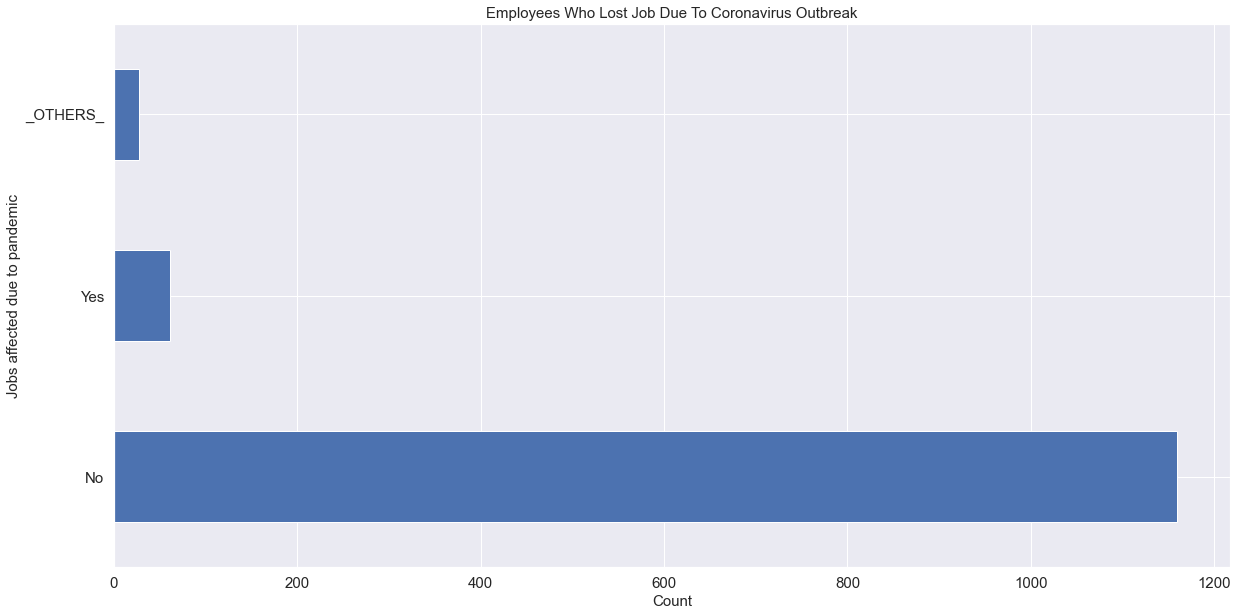

In [18]:
covid = "Have you lost your job due to the coronavirus outbreak?"
df_new[covid].value_counts().plot(kind='barh' ,figsize=(20, 10) , fontsize = 15)
plt.xlabel("Count",fontsize = 15)
plt.ylabel("Jobs affected due to pandemic" ,fontsize = 15 )
plt.title("Employees Who Lost Job Due To Coronavirus Outbreak", fontsize = 15 )

Text(0.5, 1.0, 'PROPORTION OF GENDERS')

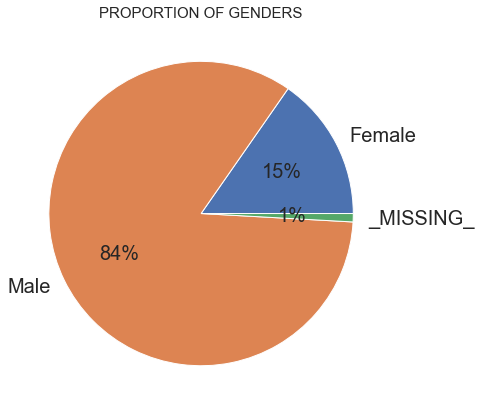

In [22]:
df_new.Gender.str.get_dummies().sum().plot.pie(label='', autopct='%1.0f%%',figsize=(10, 7) , fontsize = 20)
plt.title("PROPORTION OF GENDERS", fontsize = 15)

Text(0.5, 1.0, 'Different Company Sizes And Its Count')

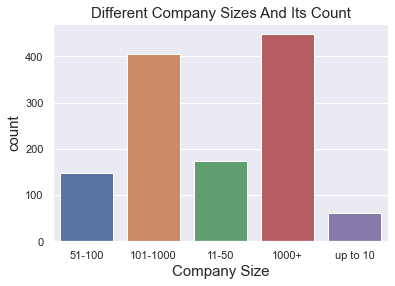

In [23]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Company size",data=df_2020)
plt.xlabel('Company Size',fontsize = 15) 
plt.ylabel('count',fontsize = 15) 
plt.title("Different Company Sizes And Its Count",fontsize = 15)

# Data Analysis

# Analysing The Salary Wages For Different Categories 


C:\Users\ravikumar\Anaconda3\lib\site-packages\seaborn\distributions.py:151: UserWarning: The handle <matplotlib.patches.Patch object at 0x00000222F35F3070> has a label of '_MISSING_' which cannot be automatically added to the legend.
  ax_obj.legend(handles, labels, title=self.variables["hue"], **legend_kws)


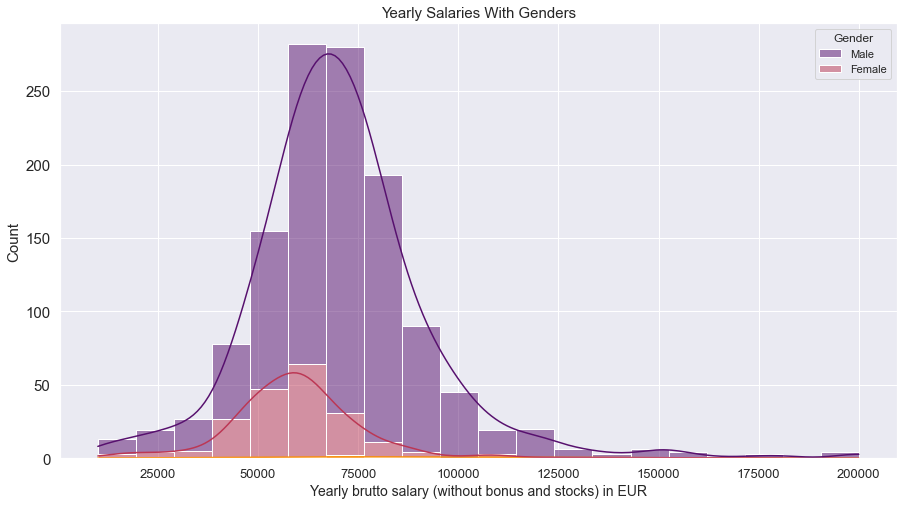

In [24]:
# Distribution of Yearly Salaries with Genders
plt.figure(figsize=(15,8))

sns.histplot(x='Yearly brutto salary (without bonus and stocks) in EUR',data=df_new,
             bins=20, kde=True, hue='Gender',multiple="stack",palette='inferno')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Yearly Salaries With Genders",fontsize=15)
plt.show()

C:\Users\ravikumar\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


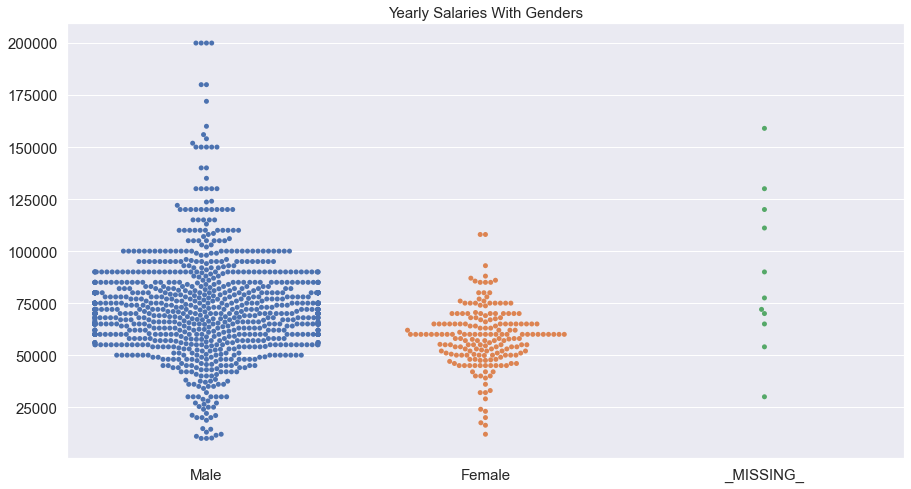

In [25]:
plt.figure(figsize=(15,8)) 

##sns.boxplot(x='Gender',y='Yearly brutto salary (without bonus and stocks) in EUR',data=new_2020,palette='Pastel2')
ax = sns.swarmplot(x='Gender',y='Yearly brutto salary (without bonus and stocks) in EUR',data=df_new)

plt.xticks(fontsize=15)
plt.xlabel("")
plt.yticks(fontsize=15)
plt.ylabel("",fontsize=15)
plt.title("Yearly Salaries With Genders",fontsize=15)
plt.show()


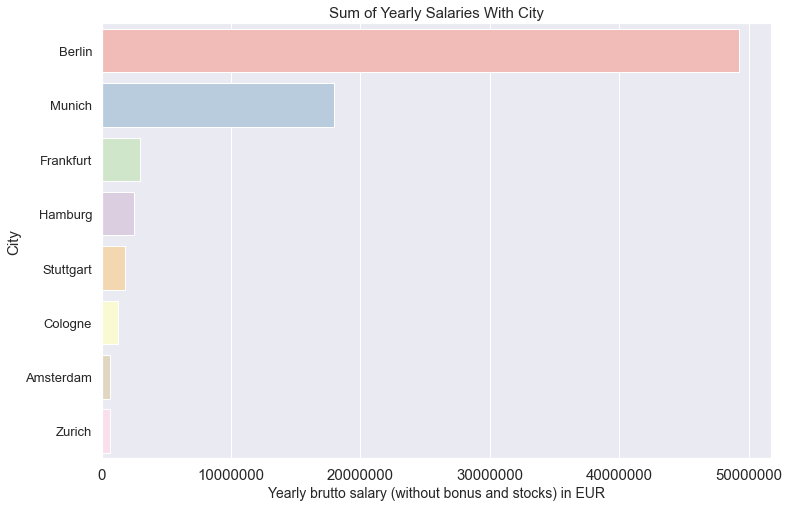

In [27]:


City_earning = df_new['Yearly brutto salary (without bonus and stocks) in EUR'].groupby(df_new['City']).sum()
City_earning.sort_values(ascending=False,inplace=True)
City_earning.head(8)

top_City = City_earning.iloc[:8].index.to_list()
avr_earning = (City_earning/ df_new['City'].value_counts()).sort_values(ascending = False)

for City in top_City:
    (City,": ",round(avr_earning[City],2))
    
City_earning = City_earning.to_frame()
plt.figure(figsize=(12,8))



sns.barplot(data=City_earning, y=City_earning.index[:8],
            x= City_earning['Yearly brutto salary (without bonus and stocks) in EUR'].iloc[:8],
            palette='Pastel1')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=15)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("City",fontsize=15)
plt.title("Sum of Yearly Salaries With City",fontsize=15)
plt.show()

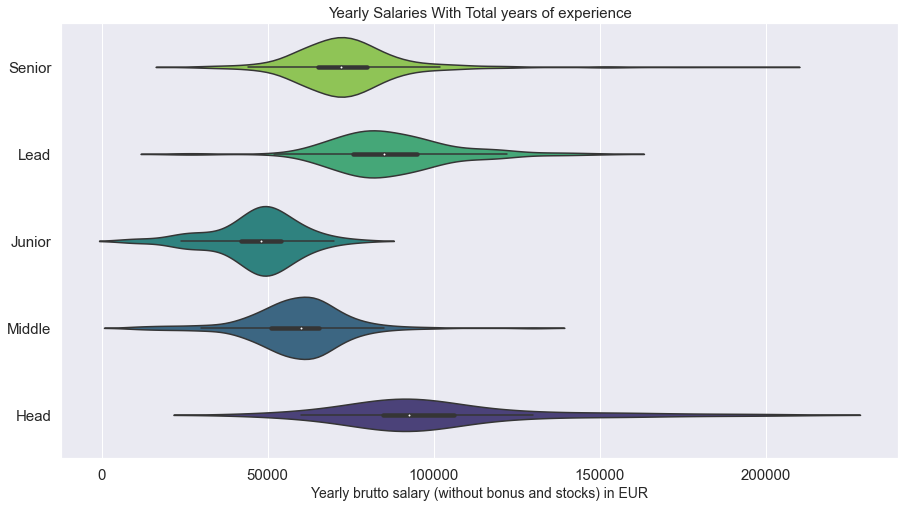

In [30]:
df_new['Total years of experience'].value_counts()

total_experience = df_new.copy().dropna(subset=['Total years of experience'])
total_experience = total_experience[total_experience['Total years of experience'].str.isnumeric()]
total_experience['Total years of experience'] = total_experience['Total years of experience'].astype(int) 

plt.figure(figsize=(15,8))
sns.violinplot(data=total_experience[total_experience['Seniority level'].isin(['Senior','Junior','Middle','Lead','Head'])],
           y='Seniority level',x='Yearly brutto salary (without bonus and stocks) in EUR',palette='viridis_r')
plt.xticks(fontsize=15)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=15)
plt.ylabel("")
plt.title("Yearly Salaries With Total Years Of Experience",fontsize=15)
plt.show()

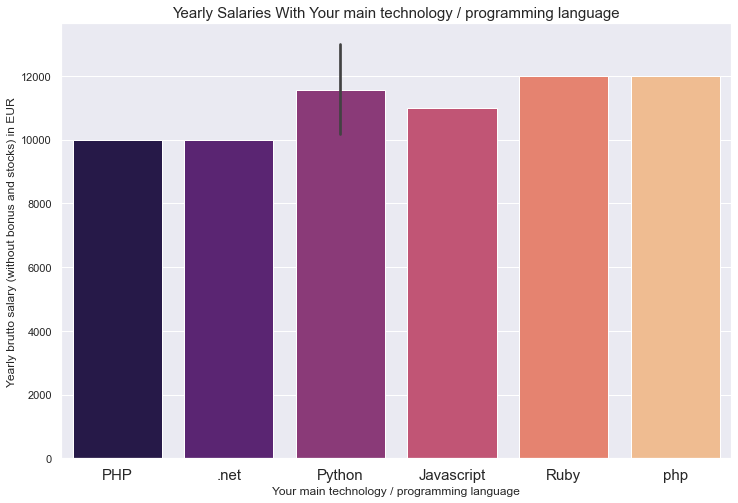

In [32]:
plt.figure(figsize=(12,8))
df_new=df_new.sort_values('Yearly brutto salary (without bonus and stocks) in EUR')
ax = sns.barplot(data=df_new.head(8),x='Your main technology / programming language',y='Yearly brutto salary (without bonus and stocks) in EUR',palette="magma")
plt.xticks(fontsize=15)

plt.title("Yearly Salaries With Your Main Technology / Programming Language",fontsize=15)
plt.show()

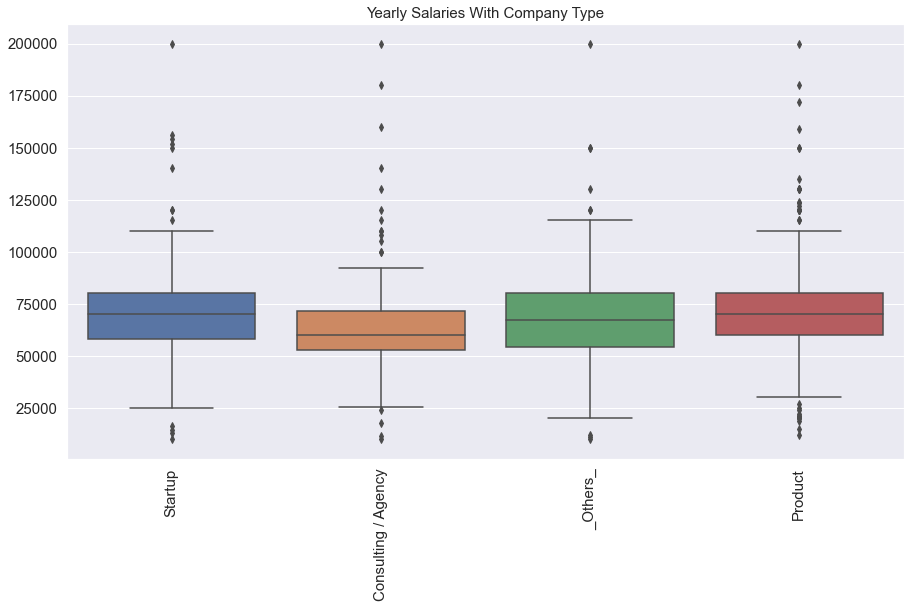

In [34]:
plt.figure(figsize=(15,8)) 


ax = sns.boxplot(x='Company type',y='Yearly brutto salary (without bonus and stocks) in EUR',data=df_new)

plt.xticks(fontsize=15, rotation=90)
plt.xlabel("")
plt.yticks(fontsize=15, )
plt.ylabel("",fontsize=15)
plt.title("Yearly Salaries With Company Type",fontsize=15)
plt.show()

# Top Positions With Highest Salary Wages


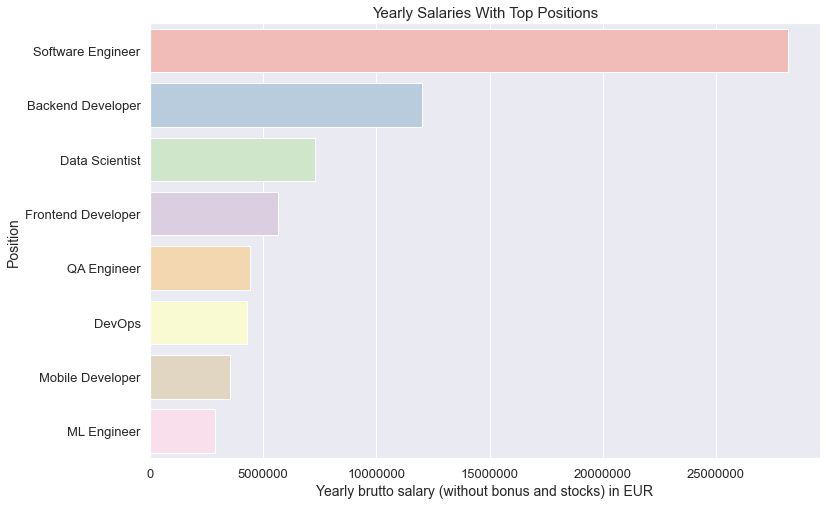

In [36]:
position_earning = df_new['Yearly brutto salary (without bonus and stocks) in EUR'].groupby(df_new['Position']).sum()
position_earning.sort_values(ascending=False,inplace=True)
position_earning.head(8)

top_position = position_earning.iloc[:8].index.to_list()
avr_earning = (position_earning/ df_new['Position'].value_counts()).sort_values(ascending = False)

for position in top_position:
    (position,": ",round(avr_earning[position],2))
    
position_earning = position_earning.to_frame()
plt.figure(figsize=(12,8))

sns.barplot(data=position_earning, y=position_earning.index[:8],
            x= position_earning['Yearly brutto salary (without bonus and stocks) in EUR'].iloc[:8],
            palette='Pastel1')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=13)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Position",fontsize=14)
plt.title("Yearly Salaries With Top Positions",fontsize=15)

plt.show()


# Have People Lost The  Job Due To The Coronavirus Outbreak?

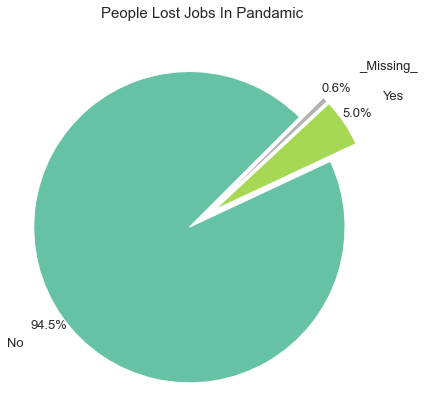

In [37]:
covid = 'Have you lost your job due to the coronavirus outbreak?'
df_new[covid].value_counts()
other_responses = pd.Series([7],index=['_Missing_'])

effected = df_new[covid].value_counts().iloc[0:2]
effected = pd.concat([effected,other_responses])
effected
effected.plot.pie(y=covid, autopct='%1.1f%%', figsize=(8,6), fontsize=13,cmap='Set2',
                     startangle=45, explode =[0.1]*3, pctdistance=1.1,labeldistance=1.3,
                    textprops={'fontsize': 15})
plt.ylabel("")
plt.title("People Lost Jobs In Pandamic",fontsize = 15)
plt.tight_layout()
plt.show()


#  Key Positions In Present market


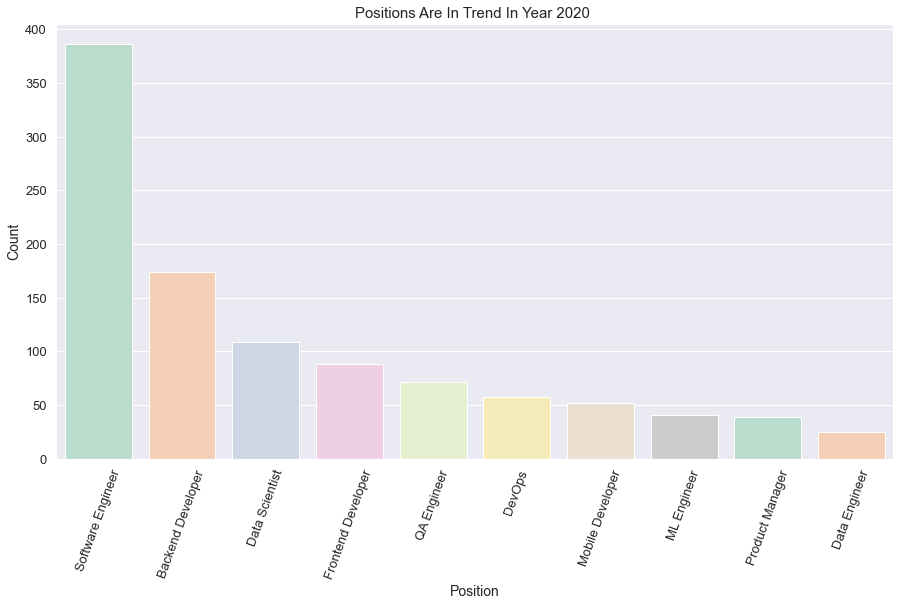

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_new,x='Position',
              order=df_new['Position'].value_counts().iloc[:10].index,
              palette='Pastel2')
plt.xticks(rotation=70,fontsize=13)
plt.xlabel("Position",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Count",fontsize=14)
plt.title("Positions Are In Trend In Year 2020 ",fontsize = 15)
plt.show()